# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from PythonAflevering1 import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt

# Question 1

**Explain how you solve the model**

In [2]:




alpha_q1 = [0.25, 0.50, 0.75] #Alpha values
sigma_q1 = [0.5, 1.0, 1.5] #Sigma values

for a in alpha_q1:
    for s in sigma_q1:
        model_q1 = HouseholdSpecializationModelClass()
        model_q1.par.alpha = a #seInserting alpha value into the model
        model_q1.par.sigma = s 
        opt = model_q1.solve_discrete() #Solving the model
        HFHM1 = opt.HF/opt.HM # Ratio between HF and HM
        print(f"alpha = {a:.3f}, sigma = {s:.3f}, forhold = {HFHM1:.3f}") # Printing solution
        
        

c:\Users\bjorn\OneDrive - University of Copenhagen\4. semester\projects-2023-pied-piper\inauguralproject\PythonAflevering1.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.250, sigma = 0.500, forhold = 0.545
alpha = 0.250, sigma = 1.000, forhold = 0.308
alpha = 0.250, sigma = 1.500, forhold = 0.214
alpha = 0.500, sigma = 0.500, forhold = 1.000
alpha = 0.500, sigma = 1.000, forhold = 1.000
alpha = 0.500, sigma = 1.500, forhold = 1.000
alpha = 0.750, sigma = 0.500, forhold = 1.833
alpha = 0.750, sigma = 1.000, forhold = 3.250
alpha = 0.750, sigma = 1.500, forhold = 4.667


# Question 2

Explain your code and procedure

In [3]:

#Creating wF values
var_wF_q2 = [0.8,0.9,1.0,1.1,1.2]

#Empty lists to store values
sol_wF_q2 = []
sol_HFHM_q2 = []


for w in var_wF_q2:
    model_q2 = HouseholdSpecializationModelClass()
    model_q2.par.wF = w # inserting wF in the model
    opt_q2 = model_q2.solve_discrete() # solving model


    HFHM = opt_q2.HF/opt_q2.HM #Ratio between HF and HM
    sol_HFHM_q2.append(HFHM) # appending to list


    WFWM = w/model_q2.par.wM # ratio between wF and wM
    sol_wF_q2.append(WFWM) # appending to list
    #print(f"forhold = {WFWM:.3f}") # Forholdet printes


log_sol_wF_q2 = np.log(sol_wF_q2) # Taking log to the ratio
log_sol_HFHM_q2 = np.log(sol_HFHM_q2) # Taking log to the ratio

print(log_sol_wF_q2) # printing solution
print(log_sol_HFHM_q2)

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 0.22314355  0.          0.         -0.11778304 -0.22314355]


In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

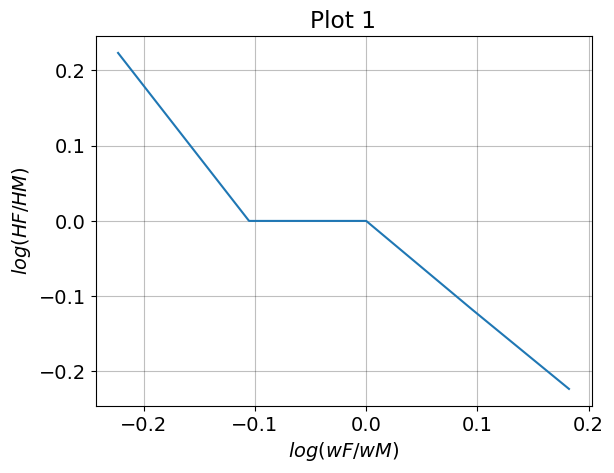

In [5]:
# creating the figure
fig = plt.figure()

# making plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_sol_wF_q2,log_sol_HFHM_q2)

# setting labels and title
ax.set_title('Plot 1')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

# Question 3

Explain your code and procedure

In [6]:
from scipy.optimize import minimize
model_q3 = HouseholdSpecializationModelClass()

# Making values
var_WF_q3 = [0.8,0.9,1.0,1.1,1.2]

# Creating empty lists
list_HFHM_q3 = []
list_WFWM_q3 = []

for w in var_WF_q3 :
    model_q3 = HouseholdSpecializationModelClass()
    model_q3.par.wF = w #Inserting wF value in model
    opt_q3 = model_q3.solve() # Solving model
    
    
    HFHM = model_q3.sol.HF/model_q3.sol.HM # Finding ratio between HF and HM
    list_HFHM_q3.append(HFHM) # Appending list
    
    
    WFWM = w/model_q3.par.wM # Finding ratio between wF and wM 
    list_WFWM_q3.append(WFWM) # Appending list

log_sol_WFWM_q3 = np.log(list_WFWM_q3) # Taking log to the slots
log_sol_HFHM_q3 = np.log(list_HFHM_q3)

print(log_sol_WFWM_q3) # Printing list
print(log_sol_HFHM_q3) 

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 2.25199585e-01  9.75472906e-05  2.15435980e-09 -8.68013145e-05
 -1.86626258e-01]


In [7]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

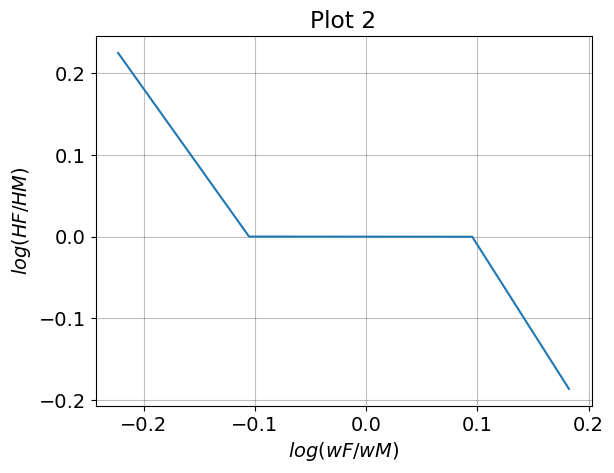

In [8]:
# Creating the figure
fig = plt.figure()

# Making plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_sol_WFWM_q3,log_sol_HFHM_q3)

# setting labels and title
ax.set_title('Plot 2')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

# Opgave 4

In [9]:
from scipy import optimize


model_q4 = HouseholdSpecializationModelClass()

# Defining model 
def solve_4(x):
    
    # Setting values to alpha and sigma in the model
    model_q4.par.alpha = x[0]
    model_q4.par.sigma = x[1]
    
    model_q4.solve_wF_vec() # solving model
    
    model_q4.run_regression() # running regression
    
    return ((0.4-model_q4.sol.beta0)**2 + (-0.1-model_q4.sol.beta1)**2) # 



bounds = [(0, 1), (0, 10)] # setting bounds
initial_guess = [0.5,1] # Creating initial guess

# Creatubg minimize function 
result = optimize.minimize(solve_4, initial_guess, 
                           bounds=bounds, method = "Nelder-Mead") 

# Printing solution
print(f"Optimal values: alpha = {result.x[0]:.3f}, sigma = {result.x[1]:.3f}")



c:\Users\bjorn\OneDrive - University of Copenhagen\4. semester\projects-2023-pied-piper\inauguralproject\PythonAflevering1.py:62: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimal values: alpha = 0.988, sigma = 0.091


In [10]:
# using Linspace to create values for sigma and alpha
alpha_q4 = np.linspace(0.95,0.99,20)
sigma_q4 = np.linspace(0.05,0.1,20)

# Creating empty list
func_vec = []

for i, a in enumerate(alpha_q4):
    for j, s in enumerate(sigma_q4):
        model_q4 = HouseholdSpecializationModelClass() 

        # Inserting alpha and sigma values in model
        model_q4.par.alpha = a 
        model_q4.par.sigma = s 

        model_q4.solve_wF_vec() # Solving model
        model_q4.run_regression() # running regression

        # Calculating function value
        func_value = ((0.4-model_q4.sol.beta0)**2 + (-0.1-model_q4.sol.beta1)**2)

        # appending function value if bigger than 0
        if func_value > 0:
            func_vec.append(func_value)

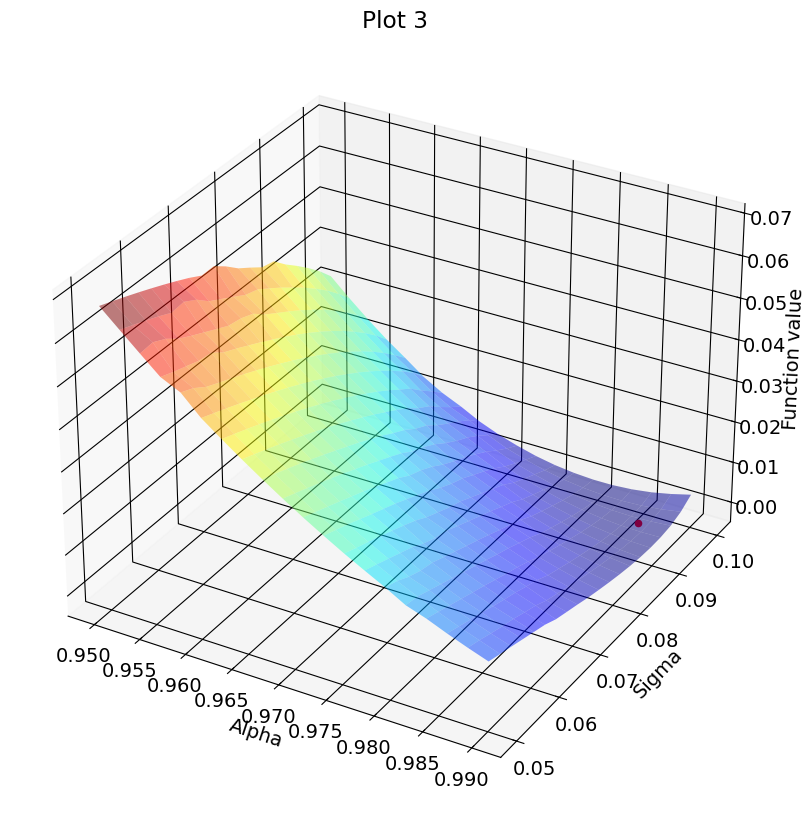

In [11]:
# Making alpha and sigma same length as the function
func_vals = np.array(func_vec).reshape(len(alpha_q4), len(sigma_q4))

# Create 2D grids of alpha and sigma values for plotting
alpha_grid, sigma_grid = np.meshgrid(alpha_q4, sigma_q4)

# Create 3D plot
fig = plt.figure(figsize=(10,10)) #Initiating figure

# explain np.array?
# Making the plot 3D
ax = plt.axes(projection='3d') 
ax.plot_surface(alpha_grid, sigma_grid, func_vals, cmap='jet', alpha = 0.50) #Creating figure
ax.scatter([0.988], [0.091], [(0.4-model_q4.sol.beta0)**2 + (-0.1-model_q4.sol.beta1)**2], color='red') #Plotting the solution

# Setting labels and titles
ax.set_xlabel('Alpha') 
ax.set_ylabel('Sigma') 
ax.set_zlabel('Function value') 
ax.set_title('Plot 3') 
plt.show() 

We find that alpha = 0.988 and sigma = 0.091. Alpha describes the productivity at home for men relative to women, with our value being 0.988 approximate 1, it means that men are very unproductive at home. With our sigma value being approximately 0.1 it means that a 1% increase in the realtive productivity of men working at home would lead to a 0.1% increase in the hours men are spending working at home.

ADD CONCISE CONLUSION.